# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.
Respresentado por el siguiente diagrama

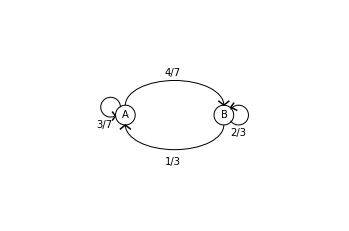

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')
plt.text(-0.80,-0.12,'3/7')
plt.text(0.57,-0.2,'2/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

In [18]:
np.random.rand?

In [28]:
c = ['A','B','C','D']
np.random.choice(c)

'D'

In [44]:
def cambiar_posicion():
    Posicion = ['A']
    OperacionesA = ['A','A','A','A','B','B','B']
    OperacionesB = ['B','B','A']
    N_Operaciones = 50
    for i in range (N_Operaciones):
        if Posicion[-1] == 'A':
            Posicion.append(np.random.choice(OperacionesA))
        elif Posicion[-1] == 'B': 
            Posicion.append(np.random.choice(OperacionesB))
    Posicion_final = 'La posición final es ' + Posicion[-1]
    return Posicion,Posicion_final,len(Posicion)

cambiar_posicion()   

(['A',
  'A',
  'A',
  'A',
  'B',
  'B',
  'A',
  'B',
  'B',
  'A',
  'A',
  'A',
  'B',
  'B',
  'B',
  'A',
  'B',
  'B',
  'B',
  'A',
  'B',
  'B',
  'A',
  'B',
  'B',
  'B',
  'A',
  'B',
  'B',
  'B',
  'A',
  'A',
  'B',
  'B',
  'A',
  'A',
  'B',
  'B',
  'A',
  'A',
  'A',
  'A',
  'A',
  'B',
  'B',
  'B',
  'B',
  'A',
  'A',
  'A',
  'B'],
 'La posición final es B',
 51)

In [54]:
def cambiar_posicionM():
    Posicion = 'A'
    OperacionesA = ['A','A','A','A','B','B','B']
    OperacionesB = ['B','B','A']
    N_Operaciones = 50
    for i in range (N_Operaciones):
        if Posicion == 'A':
            Posicion = (np.random.choice(OperacionesA))
        elif Posicion == 'B': 
            Posicion = (np.random.choice(OperacionesB))
    return Posicion
cambiar_posicionM()

'B'

In [70]:
Procesos = []
for i in range (10**5):
    Procesos.append(cambiar_posicionM())

In [71]:
Procesos.count('A'),Procesos.count('B')

(43899, 56101)

In [72]:
Probabilidad_A = ((Procesos.count('A')) / 10**5)*100
Probabilidad_B = ((Procesos.count('B')) / 10**5)*100

In [73]:
P_A = 'La probabilidad de que el proceso termine en A es del ' + str(Probabilidad_A) + ' %'
P_B = 'La probabilidad de que el proceso termine en B es del ' + str(Probabilidad_B) + ' %'
P_A,P_B

('La probabilidad de que el proceso termine en A es del 43.899 %',
 'La probabilidad de que el proceso termine en B es del 56.101 %')

---
## Problema 2. Evaluación numérica de integrales utilizando Montecarlo
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

* Defina la función para resolver el área con el método 2 visto en clase

In [82]:
import pandas as pd

In [83]:
def region (x,y):
    return (x**2) + 2*(y**2) <= (-2*x) + (8*y) - 7

In [84]:
def montecarlo2(bernoulli,minx,maxx,miny,maxy,N):
    ux = np.random.uniform(minx,maxx,N)
    uy = np.random.uniform(miny,maxy,N)
    B = bernoulli(ux,uy)
    AR = (maxx-minx)*(maxy-miny)
    return AR*np.mean(B)

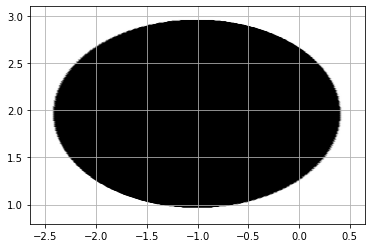

In [97]:
minx, maxx = -2.5,0.5
miny, maxy = 0.9,3#-0.5,1
x = np.linspace(minx,maxx,300)
y = np.linspace(miny,maxy,300)
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y,c =~ region(X,Y), cmap = 'gray') # ~ es negación booleana
plt.grid()

* Encontrar el área con el número de términos deseados

In [86]:
N = np.logspace(1,5,5).astype('int')
N

array([    10,    100,   1000,  10000, 100000])

In [98]:
tabla = pd.DataFrame(index = N, columns = ['Aprox', 'E rel'])
for n in N:
    tabla.loc[n, 'Aprox'] = montecarlo2(region,minx,maxx,miny,maxy,n)
AR = (maxx-minx)*(maxy-miny)
th = tabla['Aprox']/AR
tabla['E rel'] = (1/np.sqrt(N))*(((1-th)/th)**0.5)
tabla

,Aprox,E rel
10,4.41,0.20702
100,4.599,0.060816
1000,4.4541,0.020357
10000,4.4478,0.006453
100000,4.428837,0.002055


---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2021 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2020 y muestre sus gráficas.

In [142]:
import pandas_datareader.data as web

In [143]:
def getClose(names, start, end):
    return web.DataReader(names,'yahoo',start,end)['Adj Close']

In [144]:
names = ['AAPL','MSFT'] # Apple, Google
start = '2015-01-01'
end = '2020-12-31'
data = getClose(names,start,end)
data.head() # Mostrar los primeros datos

Symbols,AAPL,MSFT
Date,,
2015-01-02,24.678247,41.013306
2015-01-05,23.983025,40.636166
2015-01-06,23.985283,40.039738
2015-01-07,24.321604,40.548447
2015-01-08,25.256100,41.741310


In [145]:
data.tail() # Mostrar los úlitmos datos

Symbols,AAPL,MSFT
Date,,
2020-12-24,130.802322,219.930298
2020-12-28,135.480560,222.112335
2020-12-29,133.676682,221.312592
2020-12-30,132.536850,218.873871
2020-12-31,131.515961,219.604477


<AxesSubplot:xlabel='Date'>

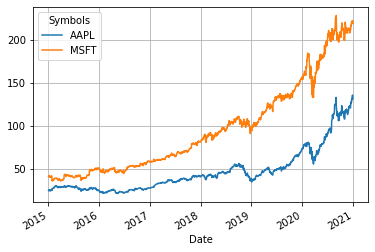

In [146]:
data.plot(grid = True)

Calcule los rendimientos diarios junto con sus características estadísticas

In [147]:
R = data.pct_change().dropna() # pct --> calcula el cambio porcentual
R.head()

Symbols,AAPL,MSFT
Date,,
2015-01-05,-0.028171,-0.009196
2015-01-06,0.000094,-0.014677
2015-01-07,0.014022,0.012705
2015-01-08,0.038422,0.029418
2015-01-09,0.001073,-0.008405


In [148]:
R.tail()

Symbols,AAPL,MSFT
Date,,
2020-12-24,0.007712,0.007827
2020-12-28,0.035766,0.009921
2020-12-29,-0.013315,-0.003601
2020-12-30,-0.008527,-0.011019
2020-12-31,-0.007703,0.003338


In [149]:
m = R.mean() # Media aritmética
ds = R.std() # Desviación estándar

In [150]:
m,ds

(Symbols
 AAPL    0.001283
 MSFT    0.001265
 dtype: float64,
 Symbols
 AAPL    0.018667
 MSFT    0.017527
 dtype: float64)

Simule 1000 escenarios de rendimientos diarios para el 2021 (para cada una de las empresas)

In [151]:
def sim(m,ds,inicio,dias,N):
    fechas = pd.date_range(inicio,periods = dias)
    R = np.random.normal(m,ds,(dias,N))
    return pd.DataFrame(data = R,index = fechas)

In [152]:
AAPL_R = sim(R['AAPL'].mean(),
            R['AAPL'].std(),
             '2020-12-31', # Fecha de inicio
            365,  # Días a simular
            100000) # Escenarios
MSFT_R = sim(R['MSFT'].mean(),
            R['MSFT'].std(),
             '2020-12-31',
            365,
            100000)

Calcule los precios con base en los rendimientos simulados

In [153]:
AAPL = data['AAPL'].iloc[-1] * (AAPL_R + 1).cumprod() # cumprod ---> producto acumulado
MSFT = data['MSFT'].iloc[-1] * (MSFT_R + 1).cumprod()

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [154]:
Umbral = data.iloc[-1] * 1.2
Umbral

Symbols
AAPL    157.819153
MSFT    263.525372
Name: 2020-12-31 00:00:00, dtype: float64

In [155]:
B_AAPL= AAPL>Umbral['AAPL']
B_MSFT = MSFT>Umbral['MSFT']

In [156]:
P_AAPL = B_AAPL.mean(axis = 1)
P_MSFT = B_MSFT.mean(axis = 1)

<AxesSubplot:>

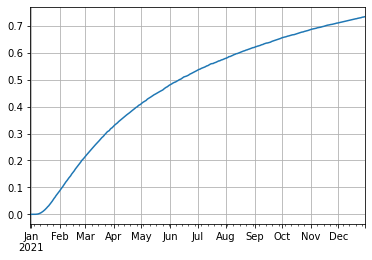

In [157]:
P_AAPL.plot(grid = True)

<AxesSubplot:>

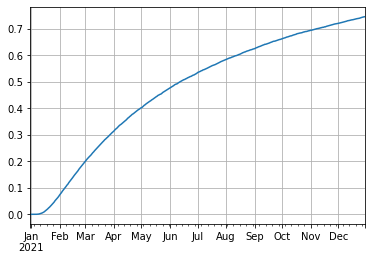

In [158]:
P_MSFT.plot(grid = True)

Finalmente, grafique los datos reales del 2021 para ver que tan acertado fue nuestro análisis.

In [161]:
data_real = getClose(names,'2021-01-01','2021-12-31')
data_real.head()

Symbols,AAPL,MSFT
Date,,
2021-01-04,128.264999,214.934387
2021-01-05,129.850845,215.141693
2021-01-06,125.479858,209.563217
2021-01-07,129.761612,215.526779
2021-01-08,130.881622,216.839920


<AxesSubplot:xlabel='Date'>

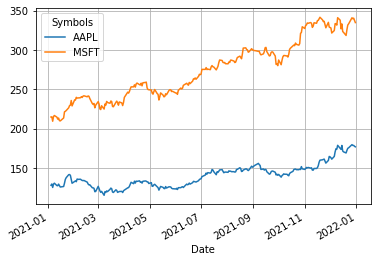

In [164]:
data_real.plot(grid = True)

In [165]:
Marcas = get

<AxesSubplot:>

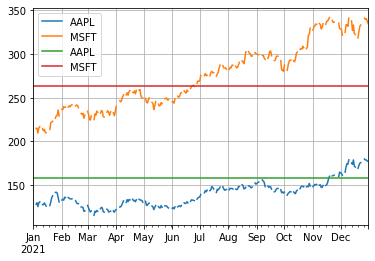

In [169]:
fechas = pd.date_range('2021-01-01','2021-12-31')
dias = len(fechas)
U_AAPL = Umbral['AAPL'] * np.ones(dias)
U_MSFT = Umbral['MSFT'] * np.ones(dias)
U = pd.DataFrame(index = fechas)
U['AAPL'] = U_AAPL
U['MSFT'] = U_MSFT
Marcas_U = pd.concat([data_real,U], axis = 1)
Marcas_U.plot(grid = True)

Se puede observar que el umbral para Microsoft se supera en Julio, al realizar la simulación se tiene una probabilidad por enciama del $50\%$, esto nos indica que la proyección fueacertada.

Por otro lado, para Apple el umbral se supera hasta noviembre donde, en nuestra simulación tenemos una probabilidad del $70\%$, lo qu enbos indica que la proyección es aún más acertada que la de Microsoft. 